# **Introducción a OpenCV**

## **Descripción**

Este notebook proporciona una introducción a la biblioteca OpenCV (cv2), una biblioteca ampliamente utilizada para la visión por computadora. Cubre la instalación, carga y visualización de imágenes, conversión de espacios de color, dibujo de formas y escritura de texto.

##**Instalación de OpenCV:**
* Instala la librería `opencv-python` usando `pip`.


In [2]:
!pip install scikit-image watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [4]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-04-15T20:57:11.354608+00:00

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 2.0.2
matplotlib: 3.10.0
cv2       : 4.11.0



##**Carga y visualización de imágenes:**
* Descarga una imagen de ejemplo usando `wget`.
* Carga la imagen con `cv2.imread()` y la muestra con `cv2_imshow()` (para Colab) o `plt.imshow()` (para otros entornos).
* **Comentario:** OpenCV usa el espacio de color BGR por defecto.

In [5]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

--2025-04-15 20:57:11--  https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
Resolving d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)... 3.163.157.19, 3.163.157.92, 3.163.157.119, ...
Connecting to d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)|3.163.157.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30340 (30K) [image/jpeg]
Saving to: ‘S03i3165l01.jpg’

S03i3165l01.jpg     100%[===================>]  29.63K  --.-KB/s    in 0.06s   

2025-04-15 20:57:11 (470 KB/s) - ‘S03i3165l01.jpg’ saved [30340/30340]



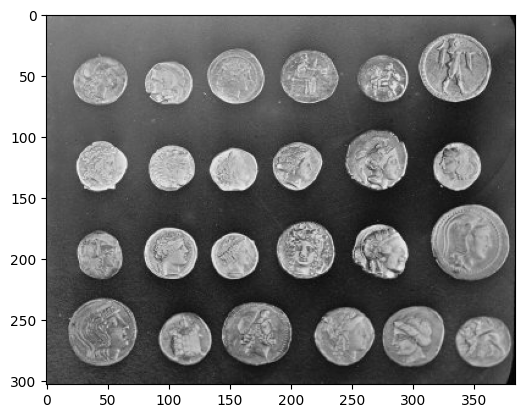

In [6]:
img = imread('S03i3165l01.jpg')
plt.imshow(img)
plt.show()

##**Información de la imagen:**
* Accede a propiedades de la imagen como ancho, alto y tipo de datos.

In [7]:
#Mostramos el tipo de variable
type(img)

numpy.ndarray

In [8]:
#Muestra información de las imagenes
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

data_img(img)

Tamaño =  (303, 384, 3)
Max  =  252
Min  =  1


## Recorte de imagen

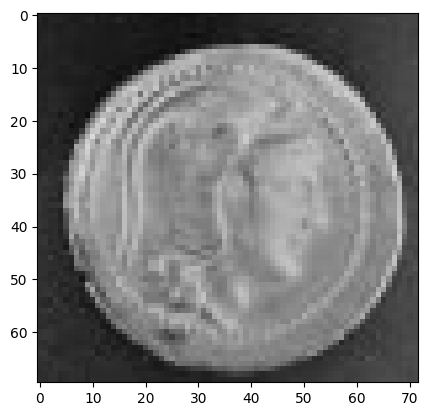

In [9]:
# Primero alto, despues ancho
img_cropped = img[150:220, 310:382]
plt.imshow(img_cropped)

In [10]:
data_img(img_cropped)

Tamaño =  (70, 72, 3)
Max  =  218
Min  =  12


60 61


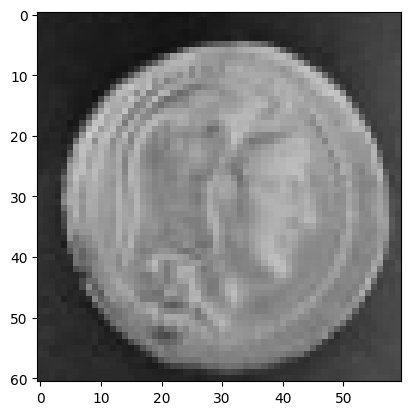

In [11]:
# Primero ancho y despues alto
ancho=60
alto=int((ancho/70)*72)
print(ancho,alto)
img_resize = cv2.resize(img_cropped, (ancho,alto))
plt.imshow(img_resize)

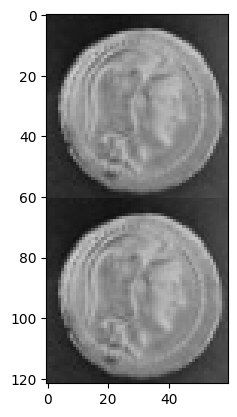

In [12]:
# Apilado vertical
ver = np.vstack((img_resize, img_resize))
plt.imshow(ver);

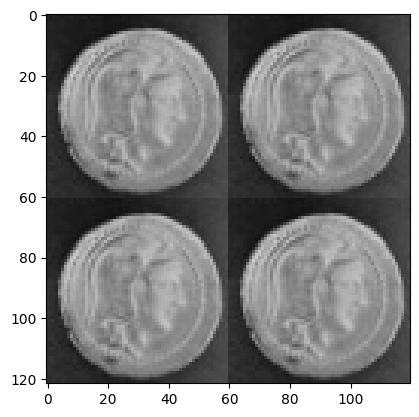

In [13]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
plt.imshow(hor2);

## Seleccion del primer canal de color

In [14]:
X = img_cropped[:,:,0]
data_img(X)

Tamaño =  (70, 72)
Max  =  218
Min  =  12


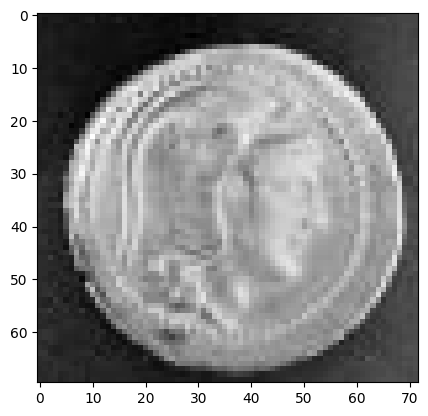

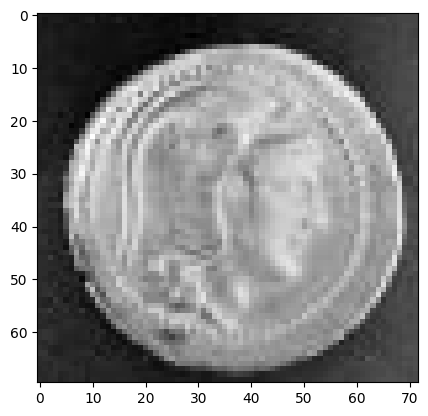

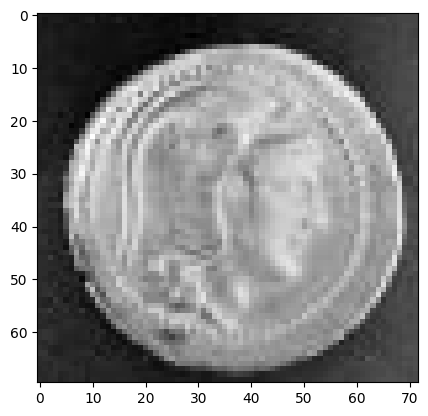

In [15]:
B=img_cropped[:,:,0]
G=img_cropped[:,:,1]
R=img_cropped[:,:,2]
plt.imshow(B,cmap='gray')
plt.show()
plt.imshow(G,cmap='gray')
plt.show()
plt.imshow(R,cmap='gray')
plt.show()


##**Conversión de espacio de color:**
* Convierte la imagen entre BGR, RGB, HSV y escala de grises usando `cv2.cvtColor()`.

Tamaño =  (70, 72)
Max  =  218
Min  =  12


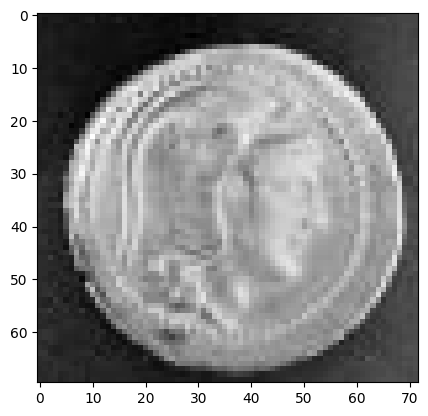

In [16]:
# Convertir a escala de grises usando OpenCV
gray_image = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)
data_img(gray_image)
plt.imshow(gray_image, cmap='gray')
plt.show()



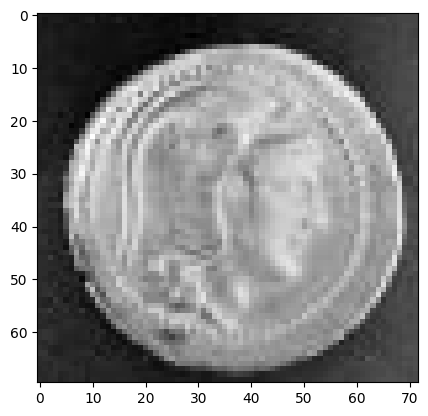

In [17]:
plt.imshow(X,cmap='gray')
plt.show()

#Trabajo con una segunda imagen

##Carga de la Imagen y muestra de informacion

In [18]:
!wget 'https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/145086.jpg'

--2025-04-15 20:57:14--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/145086.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33884 (33K) [image/jpeg]
Saving to: ‘145086.jpg’

145086.jpg          100%[===================>]  33.09K  --.-KB/s    in 0.02s   

2025-04-15 20:57:14 (1.70 MB/s) - ‘145086.jpg’ saved [33884/33884]



In [19]:
img_color = imread('145086.jpg')
data_img(img_color)

Tamaño =  (321, 481, 3)
Max  =  255
Min  =  0


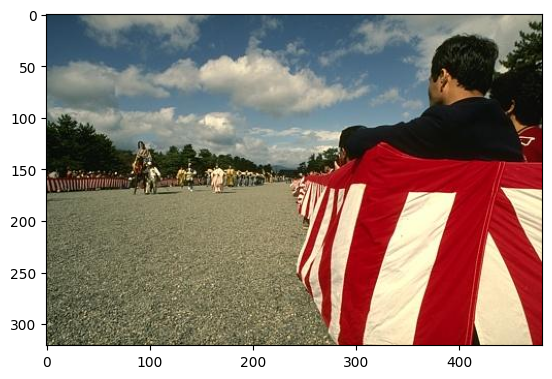

In [20]:
img_rgb=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Recorte

Tamaño =  (100, 70, 3)
Max  =  255
Min  =  0


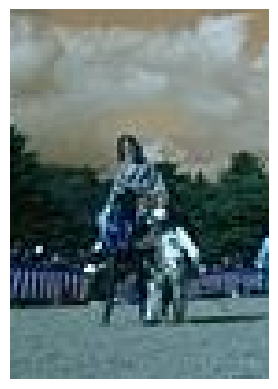

In [21]:
#Recorte de una seccion de la imagen
caballo=img_color[90:190,60:130]
data_img(caballo)
plt.imshow(caballo)
plt.axis('off')
plt.show()

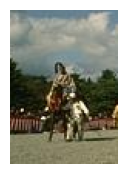

In [22]:
#Muestro la imagen usando plt
caballo_rgb=cv2.cvtColor(caballo,cv2.COLOR_BGR2RGB)
height, width, _ = caballo_rgb.shape
plt.figure(figsize=(width / 50, height / 50), dpi=100)
plt.imshow(caballo_rgb)
plt.axis('off')
plt.show()

## Busqueda de bordes
**uso de la funcion Canny de openCV**
Utiilizamos la funcion Canny para buscar bordes en las formas del recorte elegido.

Tamaño =  (100, 70)
Max  =  252
Min  =  1


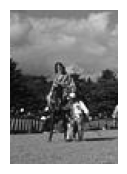

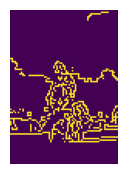

In [23]:
#Convierto a escala de grises
caballo_gray=cv2.cvtColor(caballo,cv2.COLOR_BGR2GRAY)
data_img(caballo_gray)
plt.figure(figsize=(width / 50, height / 50), dpi=100)
plt.imshow(caballo_gray,cmap='gray')
plt.axis('off')
plt.show()

#Busqueda de bordes
bordes=cv2.Canny(caballo_gray,200,250)
height, width = caballo_gray.shape
plt.figure(figsize=(width / 50, height / 50), dpi=100)
plt.imshow(bordes)
plt.axis('off')
plt.show()

##Separacion de canales
Separo y muestro los canales utilizando cmap para mapear colores en cada uno

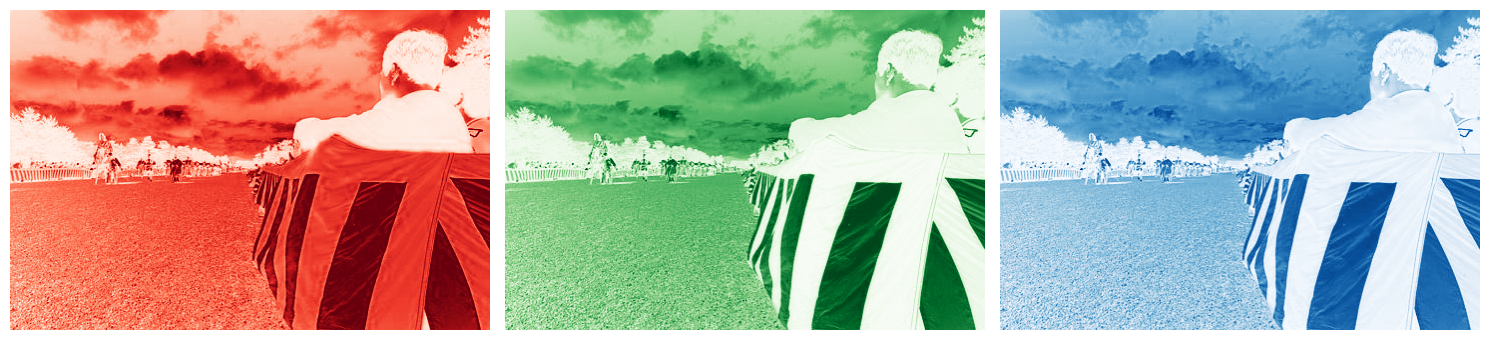

In [24]:
#Separo los canales con numpy
imagen_R=img_rgb[:,:,0]
imagen_G=img_rgb[:,:,1]
imagen_B=img_rgb[:,:,2]

#Muestro los canales con plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(imagen_R, cmap='Reds')
axes[0].axis('off')
axes[1].imshow(imagen_G, cmap='Greens')
axes[1].axis('off')
axes[2].imshow(imagen_B, cmap='Blues')
axes[2].axis('off')
plt.tight_layout()
plt.show()
